# Nonlinear methods (Manifold learning), Self Learning ML2 Part 2

This notebook is adapted from FE et al. and corrected/edited by JN ( last update: April 2021). 
This notebook is complementary to the lecture slides. It may serve you to find further reading, learn some keywords,
or get a deeper understanding by just more examples and more things around the stuff, or from another perspective. 
You do not need to study this in order to be prepared for the exam. It is just a bit more meaty meaty.

Warning: The jupyter notebook is not clean, do not excecute any of the below, just see it as a pdf.

Methods in this group don't linearly transform the data but still provide _embeddings_, that is, mappings from the original feature space into a different, lower dimensional space which are sensitive to the non-linear/only locally linear structure in data. These methods are typically unsupervised, they discover structure in the data without class labels or other type of supervised information.

### Stochastic Neighborhood Embedding (SNE and t-SNE)

SNE and t-SNE was developed in 2008 by van der Maaten and Hinton ([original paper](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)) explicitly as a method for visualization: it maps the original dataset into 2- or 3-dimensional space while trying to keep as much useful positional similarity information as possible.

In contrast to traditional linear techniques  (e.g., PCA) that focus on keeping dissimilar points far apart, SNE focuses on keeping the low-dimensional representations of very similar points close together, which typically requires nonlinear mapping.

#### "vanilla" Stochastic Neighborhood Embedding (SNE)

The main idea of SNE is to model the similarity of point pairs in the feature space by conditional probabilities:

> "The similarity of datapoint $\mathbf x_j$ to datapoint $\mathbf x_i$ is the conditional probability , that $\mathbf x_i$ would pick $\mathbf x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $\mathbf x_i$ ."

Accordingly, the (not necessarily symmetrical) similarity of a point $\mathbf x_j$ to  $\mathbf x_i$   is the conditional probability

$$p_{j|i} = \frac{f_i(\|\mathbf x_i-\mathbf x_j \|)}{\sum_{k\neq i}f_i(\|\mathbf x_i-\mathbf x_k \|)}$$

where we $f_{i}(\cdot)=\mathcal N(0, \sigma_i^2)$ is a Gaussian pdf. The goal of SNE is to 

* find the ideal $\sigma_i^2$ values for each $\mathbf x_i$ data point,
* for each $\mathbf x _i$ find a corresponding $\mathbf y_i$ in the target space such that the corresponding 

  $$q_{j|i} = \frac{g(\|\mathbf y_i-\mathbf y_j \|)}{\sum_{k\neq i}g(\|\mathbf y_i-\mathbf y_k   \|)}$$
  conditional probabilites with $g(\cdot)= \mathcal N(0, \frac{1}{\sqrt{2}})$ as close as possible to the original ones.
 
##### Setting  the $\sigma$ parameters
 
The appropriate $\sigma$ values are set separately for each point in a way that the entropy of the corresponding relative distribution remains constant. This has the effect that the variance depends on the relative density of the neighboring points:  in relatively dense regions a smaller variance is better, since we want to discriminate more between the relatively close points, while for points in rare regions a higher variance is set.
 
##### Finding the optimal mapping

Having set the variances SNE tries to maximize the closeness of the conditional probabilities in the two spaces by minimizing the cost function

$$C=\sum_i KL(P_i\|Q_i)$$

where $P_i$ and $Q_i$ are the above defined conditional probability distributions corresponding to each $\mathbf x_i$ and $\mathbf y_i$ pair, and $KL$ is the Kullback-Leibler probability distribution divergence (cf ML0). The optimization method used is gradient descent (cf ML1).

#### t-SNE 

t-SNE differs from vanilla SNE in two  respects:

##### A single symmetrical similarity measure

Instead of the separate conditional probability distributions for each point it defines a single joint probability distribution over point pairs in both the original feature space and the target lower dimensional feature space and tries to minimize the KL divergence between these distributions. This change leads to a simpler gradient and, therefore, faster optimization  process. The joint probabilities are defined in terms of the conditional probabilites defined earlier for the high dimensional space

$$
p_{i,j} = \frac{p_{i|j} + p_{j|i}}{2n}
$$

but simply as 

$$
q_{i,j} = \frac{g(\|\mathbf y_i-\mathbf y_j \|)}{\sum_{k\neq l}g(\|\mathbf y_k-\mathbf y_l \| )}
$$

for the lower dimensional target space.

The used cost functions is changed accordingly to be simply the divergence of the two joint distributions:

$$
C = KL(P\|Q).
$$

##### Student's t instead of normal distribution

The other difference is that in order to alleviate  the "crowding problem" (a kind of dimensionality curse), i.e., the problem that when distances between relatively close points are accurately modeled then

> "the area of the two-dimensional map that is available to accommodate moderately distant datapoints will not be nearly large enough compared with the area available to accommodate nearby datepoints"

the more heavily tailed Student t distribution is used as $g(\cdot)$ instead of the normal distributions used by vanilla SNE -- moderately distant points can be placed farther.

#####  t-SNE limitations

* Does not work well for more dimensions than 2 or 3.
* Works really well only with locally linear manifolds.
* The objective function is not convex, so the results vary depending on the initialization.
* The used optimization method is too slow to be used for large data sets (takes hours for a data set with a  million data points) -- for larger data sets a sample subset has to be used. There are methods to choose "representative" points.
* Embedding new data is non-trivial and not implemented by most of the available t-SNE implementations, but see [OpenTNSE](https://github.com/pavlin-policar/openTSNE) for an implementation which actually provides this functionality.

### A nice visual introduction

#from IPython.display import IFrame
#IFrame("https://www.youtube.com/embed/NEaUSP4YerM?start=83",500,400)

Another illustrated introduction can be found [here](https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm).

##### Trying it out


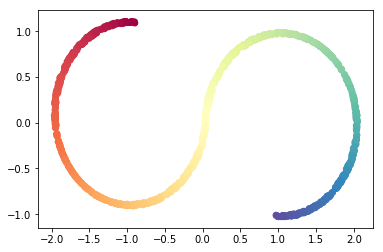

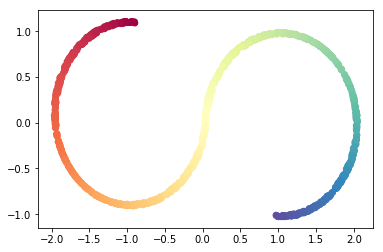

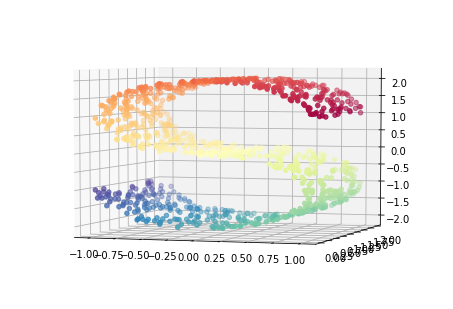

In [38]:
##################### 看看dataset #####################
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

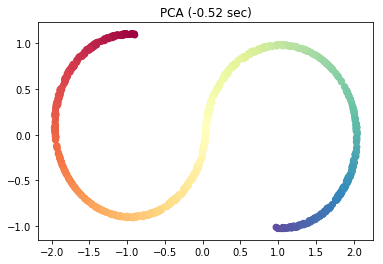

In [41]:
##################### 用PCA处理 #####################

t0 = time()

pca = PCA(n_components=2)
Y = pca.fit_transform(X)
plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

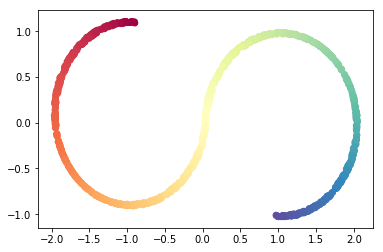

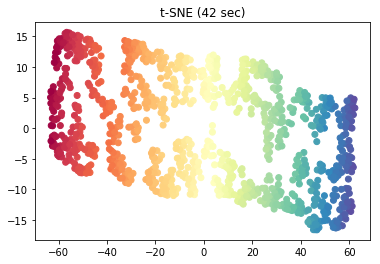

In [40]:
##################### 用t-SNE处理 #####################

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

#### Further resources
+ The original t-SNE paper:
  [L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9, 2008](https://lvdmaaten.github.io/publications/papers/AISTATS_2009.pdf)
+ A more accessible [Google Techtalk introduction video](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw)

#### Further resources, another method called UMAP

- [How UMAP works](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) -- a relatively easy-going description in the UMAP user guide.
- The UMAP paper: [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426)
- Official UMAP implementation: https://github.com/lmcinnes/umap

<span style='background:white'> 

### Self Organizing Map (SOM)

* Developed in  the 1980s by Teuvo Kohonen Finnish AI researcher .
* Unsupervised method.
* Produces a nonlinear mapping from a high dimensional feature space to a low (typically two) dimensional __discrete__ map 
* Uses a neural network with a special topology and learning rule.

#### Neural network
 
A network for a mapping from an $n$-dimensional space consists of neurons arranged in the form of a 2- (or rarely 3-) dimensional map -- with each neuron having $n$ weights.

<a href="https://codesachin.files.wordpress.com/2015/11/kohonen1.gif">
#<img src="https://drive.google.com/uc?export=view&id=10TCnWjWz0d5R673rKhNFNdMBVLHrER0t">
<img src="https://codesachin.files.wordpress.com/2015/11/kohonen1.gif">
</a>

(image source: [Sachin Joglekar: SOMs with TensorFlow](https://codesachin.wordpress.com/2015/11/28/self-organizing-maps-with-googles-tensorflow/))

</span>

#### Training

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Somtraining.svg/500px-Somtraining.svg.png">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Somtraining.svg/500px-Somtraining.svg.png">
</a>

Training uses so called "competitive learning". Starting with a network with randomly initialized weights the following steps are performed for each data point:

* Find the neuron whose weights are closest to the data point -- this will be the current Best Matching Unit (BMU). 
* Adjust the weights of the BMU neuron to be closer to that data point. The amount of adjustment  is determined by a learning rate which decreases after each iteration.
* Also adjust the BMU’s neighbors' weights to be closer to that data point as well, with farther neighbors adjusted less. The "neigborhood radius" is also decreasing during training.

The above steps are repeated (typically many times for the whole data set) until the weights of the network stabilize.

[source](https://www.youtube.com/watch?v=abF_FdCb5OI)



In [ ]:
#### Mapping

After training an input data point is mapped simply to the place of the BMU neuron.



#### Resulting Maps

In addition to arranging similar datapoints into clusters, SOMs are good at placing similar clusters close to each other.

Some examples:

Map taught with only 10 example colors as RGB triplets:

<a href="http://jjguy.com/som/somcolor-after.png">
<img src="http://jjguy.com/som/somcolor-after.png" width="500"></a>

(Image source: http://jjguy.com/som/ where the training process can be seen live)


Typical applications include mapping documents, e.g. this map does it with Wikipedia articles:
<a href="https://upload.wikimedia.org/wikipedia/commons/0/07/Self_oraganizing_map_cartography.jpg">
<img src="https://upload.wikimedia.org/wikipedia/commons/0/07/Self_oraganizing_map_cartography.jpg" width="600"></a>

("mountains" are just cluster border visualisations)

(image source: https://en.wikipedia.org/wiki/Self-organizing_map)

#### Disadvantages

+ Training can be computationally expensive
+ The mapping is discrete
+ Does not work well with categorical data

#### Further reading

+ [Algobeans SOM tutorial](https://algobeans.com/2017/11/02/self-organizing-map/)
+ [Simple SOM training demos](http://jjguy.com/som/)





Though we tried to cover the more important forms of dimensionality reduction techniques, we can by no means claim full coverage, **many more techniques exist**. A nice summary of tips and methods can be found in the **[Ten quick tips for effective dimensionality reduction
](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006907)**.

<a id="modeling"></a>
# Modeling and representation

Representation learning has deep connections with visualization - namely dimensionality reduction allows us to project high dimensional data onto 2D or 3D planes so that we can visually inspect them.

But the main usefulness of representation (inspired) methods lies in their "combination" with classification and regression methods as "prior" "embedding" steps. This approach is mainly used in so called kernel methods.

## Kernel methods

### The advantages of "exploding the feature space"
As we have just seen, dimension reduction has many advantages, but other types of feature space transformations can also be useful in certain situations. For instance, as the case of polynomial regression demonstrated, "exploding the feature space" that is, transforming the data into a higher dimensional feature space can also serve us when we would like to use a model whose parameters are linear in its input feature space (e.g., linear regression or classification methods with linear decision boundaries) to find nonlinear patterns (e.g. nonlinear decision boundaries). The trick is, of course, to apply a nonlinear transformation to the data and use the method to find parameters (e.g. decision boundaries) that are linear in the new feature space but nonlinear in the original one:

<a href="https://journals.plos.org/ploscompbiol/article/figure/image?download&size=large&id=info:doi/10.1371/journal.pcbi.1000173.g006">
<img  src="https://journals.plos.org/ploscompbiol/article/figure/image?download&size=large&id=info:doi/10.1371/journal.pcbi.1000173.g006"></a>



In its most general form, transforming the feature space is to use a new set of feature vectors $$\{\phi(\mathbf x_1),\dots,\phi(\mathbf x_N)\}$$ for training instead of the original $\{\mathbf x_1,\dots,\mathbf x_N\}$ data where $\phi$ is any function mapping vectors to vectors. In the case of a one-variable polynomial regression $\phi$ is simply the mapping

$$
\phi(\langle x\rangle) = \langle x, x^2,\dots,x^m \rangle.
$$


<a href="https://pbs.twimg.com/media/DJJKZR2XgAAliTi.jpg">
<img src="https://pbs.twimg.com/media/DJJKZR2XgAAliTi.jpg" width=400 heigth=400></a>

### But what about the curse of dimensionality?
When $\phi$ increases the number of dimensions/features we may be faced with the by now familiar problems of high dimensionality:

1. ML on high dimensional data is computationally expensive (both for memory and time, and frequently prohibitively so).
2. In the new high dimensional feature space our data becomes sparse and this can lead to overfitting.

We will return the second problem later, but, somewhat surprisingly, the first concern in many cases can be addressed by a clever move: Instead of _explicitly_ expanding the feature space, we can keep working with the original data and modify our algorithms to work in a way which _implicitly_ assumes an expanded feature space, but does not have the computational cost of explicit expansion. Methods using this solution are called "kernel methods" and the technique is frequently called the "kernel trick". 

### The kernel trick

The main observation on which the technique relies is that many ML algorithms (e.g., linear regression, SVM) can be rewritten in a form which does not refer to vectors in the input feature space explicitly but only implicitly via their _dot product_. For algorithms rewritten in this, so called _kernelized_ form it is enough to replace all references to the dot products of vectors in the input space, e.g., $\mathbf x \cdot \mathbf y$ with $\phi(\mathbf x) \cdot \phi(\mathbf y)$ to get a version which implicitly works in the transformed feature space, but does not require explicit feature mapping.

To demonstrate how accessing a high dimensional feature space only implicitly, in the form of dot products can be useful consider the feature map

$$
\phi(\langle x_1,x_2 \rangle) = \langle 1, x_1^2, x_2^2, \sqrt 2 x_1, \sqrt 2 x_2, \sqrt 2 x_1 x_2 \rangle.
$$

Because of the presence of the combined feature $\sqrt 2 x_1 x_2$ and quadratic features $\sqrt 2 x_1^2$ and $\sqrt 2 x_2^2$ this seems like a useful nonlinear feature expansion, albeit a bit complex. But much of the complexity vanishes if we have to calculate only the dot product of two transformed vectors, since

$$
\phi(\mathbf x) \cdot \phi(\mathbf y) = \langle 1, x_1^2, x_2^2, \sqrt 2 x_1, \sqrt 2 x_2, \sqrt 2 x_1 x_2 \rangle \cdot 
\langle 1, y_1^2, y_2^2, \sqrt 2 y_1, \sqrt 2 y_2, \sqrt 2 y_1 y_2 \rangle =
$$

$$
1 + x_1^2 y_1^2 + x_2^2 y_2^2 + 2x_1 y_1  + 2 x_2 y_2  + 2 x_1 y_1 x_2 y_2 = (1 + x_1 y_1 + x_2 y_2)^2 = (1 + \mathbf x \cdot \mathbf y)^2
$$
that is, compared to calculating $\mathbf x \cdot \mathbf y$ we have only a simple scalar addition and multiplication as added difficulty, but in exchange we are _implicitly_ operating over a 6-dimensional quadratic feature space.


### Kernel functions
The two-variable $K(\mathbf x,\mathbf y) = \phi(\mathbf x) \cdot \phi(\mathbf x)$ 
functions with which dot products are replaced when the kernel trick is applied are collectively known as kernel functions or kernels for short: any function is a kernel if it can be written in this form with some $\phi$ feature map. 

In addition to the above straightforward characterization, there are other, way more technical conditions of "kernelhood" that do not require explicitly this form but from which the possibility  of rewriting the function into this form follows (although the underlying feature mapping is not guaranteed to be especially tidy or even finite dimensional!!!), most notably that the function should be [positive semi-definite](https://en.wikipedia.org/wiki/Positive-definite_function) or, equivalently, should satisfy [Mercer's condition](https://en.wikipedia.org/wiki/Mercer%27s_theorem#Mercer%27s_condition). Unfortunately, the details are beyond the scope of this course.

The advantage of these more abstract characterizations is that they can be used to prove 

- that certain functions are kernels for which this is far from obvious (e.g. Gaussian kernels, see below).
- some general properties of kernels that are very useful for constructing complex kernels from simpler ones: The most important fact here is that
> any positive linear combination of kernels is also a kernel.

**Warning:** Sometimes the literature uses "kernel" in a much more general sense to denote any two-variable real valued function which is used as a similarity measure between its arguments.

### Kernelization and instance based methods
An important consequence of kernelization for many algorithms is that they become instance-based, i.e., in addition to learned parameters, they also need to store some individual training examples in memory in order to be able to predict.

The reason is that in many cases the non-kernelized versions of these algorithms learn one ore more vectors in the feature space as parameters (e.g. a normal vector of a separating hyperplane), and these parameters are no more explicitly representable after kernelization. The typical solution is to prove a so called **representer theorem** stating that such learned parameters can be written as linear combination of vectors in the image of training data according to the kernel's implicit feature mapping, that is, for those $p$ parameters

$$
p = \sum_{i=1}^N \alpha_i\phi(\mathbf x_i)
$$

for some $\alpha_i$ parameters and the training data. 

For many kernelized models and datasets most of the $\alpha_i$-s will be $0$, i.e., $p$ will be a linear combination of the value of $\phi$ for a few of the data points. Since the learned parameters are used only in dot products with other $\phi$ values (e.g. when calculating on which side of a hyperplane a point's image is located in a binary classifier), the explicit computation of $\phi$ values can be avoided by the kernel trick:

$$
p \cdot \phi(\mathbf z) = \left(\sum_{i=1}^N \alpha_i\phi(\mathbf x_i)\right) \cdot \phi(\mathbf z) = \sum_{i=1}^N \alpha_i\phi(\mathbf x_i) \cdot \phi(\mathbf z) = \sum_{i=1}^N \alpha_i K(\mathbf x_i, \mathbf z)
$$
but this still requires the storage of the non-zero $\alpha_i$ and $\mathbf x_i$ components of $p$'s representation, i.e. the storage and use of some of the training data.

### ML algorithms/methods with kernelized versions
A huge number of popular ML algorithms/methods have kernelized versions. Some of the most important ones are
* SVM 
* PCA
* Linear discriminant analysis (LDA)
* K-means

### Popular kernels

Some of the widely used kernels are

* **Linear kernel**: $K(\mathbf x, \mathbf y)=\mathbf x \cdot \mathbf y$: This is the kernel without any feature mapping (or with the identity feature mapping), which is used with kernelized algorithms when no feature mapping is needed.

* **Polynomial kernels**: kernels of the form $K(\mathbf x, \mathbf y) = (1+ \mathbf x \cdot \mathbf y)^n$ where $n$ is an integer -- these kernels correspond to polynomial feature mappings (we have seen an instance as an example above).

* **Gaussian or RBF (Radial Basis Function) kernels**: kernels of the form 
$$K(\mathbf x, \mathbf y) = \exp(-\frac{\|\mathbf x-\mathbf y\|^2}{2\sigma^2}).$$
Can be seen as inducing a nonlinear, Gaussian weighted distance metric on the original feature space. On the other hand, the "implicit feature mapping" behind them is infinite dimensional as can be shown by using the Taylor series expansion of the exponential function. (See, e.g., [these slides](https://www.csie.ntu.edu.tw/~cjlin/talks/kuleuven_svm.pdf) for details.)

* **String kernels**: These kernels operate on strings and measure their similarity in various ways, e.g., they can measure the number of substrings that occur in both of them (strings are from alphabet $A$):
$$K(\mathbf x, \mathbf y) = \sum_{s\in A^*}w_s c_s(\mathbf x)c_s(\mathbf y)$$
where $c_s(\mathbf x)$ is the number of occurrences of $s$ in $\mathbf x$ as a substring, and $w_s$ is a weight belonging to $s$. Similarly to the Gaussian kernel, the underlying feature space has an inifinite number of dimensions but here -- in contrast to the Gaussian -- the used feature mapping is fairly obvious.

<a href="https://qph.fs.quoracdn.net/main-qimg-c7f5c6f1fc6d4be7daaaf82d975e226e">
<img src="https://qph.fs.quoracdn.net/main-qimg-c7f5c6f1fc6d4be7daaaf82d975e226e" width=600 heigth=600></a>

### Kernel methods and overfitting
Fortunately, despite the implicit use of high dimensional feature spaces, the usual means of avoiding overfitting, i.e.,  regularization and careful, cross-validation based hyperparameter tuning work well with kernel methods. Moreover, in the case of kernel SVM, which is the most frequently used kernel method, experience and some theoretical results from learning theory show that the (properly set) max margin objective already acts as a very strong regularizer (capacity limiter), see e.g. [this presentation](https://www.cs.utah.edu/~piyush/teaching/27-9-print.pdf) for some details.



# Understanding representation learning

- **Memorization:**

Like KNN, it is pure "remembering", basically a database learner, or a "lookup table", where we just query the similar items. The database is itself it's own model, no compression.

If we imagine, even a linear model captures "the essence" of a relationship in the data, every point contributes to the "memory" - good illustration: problems with outliers and robust regression methods - remembering the "false" signal, even with high "leverage".

We can conclude: every model memorizes. The question is: For any kind of more abstract model, we would like it to memorize "the gist of the relationship", that is to "generalize". (See problem of overfitting) To avoid this, we would like the model to be the most "concise" description of the relationship (Occam factor).

- **Compression / hashing (capturing most salient features)**

Concisely describing something can be understood as a form of lossful compression. We can compress something if we can substitute it's description to a more compact one (see the whole literature on information theory and compression), which is only possible, if we capture something deeply descriptive about the phenomena. To put it another way, if we capture the "salient" features of the data, we can describe it short, thus our "understanding" (model) of it is good. This is the motivation behind the [Hutter prize](https://en.wikipedia.org/wiki/Hutter_Prize) which is a prize for compressing 100Mb of Wikipedia texts - and it *is* an AI prize!

[Hashing](https://en.wikipedia.org/wiki/Hash_function) is in connection with compression ("mapping data of arbitrary size to data of a fixed size"), meaning the systematic mapping of one representation to another, which can be understood as a function.

- **Function application on space**

Learning or engineering of features from raw data is the creation of (successive) transformations (in the form of functions) that are applied to the data to bring it's salient features into the foreground, so as to enable it's compression, representation in a lower dimensional space. 

- **"Embed and cut"**

Since the lower dimensional space of features captures the essence of phenomena, it is suitable as an input for a (linear) classification. The "signal" is the distance / separability of classes, the "noise" is the scatteredness of classes. (Connection with [Fisher information](https://en.wikipedia.org/wiki/Fisher_information#Matrix_form))

**Conclusion: you need only a simple classifier, but over a very good (learned representation).**

**_Representation is everything_.**

# Summary of "classical" methods

Scikit has a nice - but naturally very oversimplified - "decision tree" about the estimators it incorporates.Many times it is worth checking. 

<a href="https://scikit-learn.org/stable/_static/ml_map.png">
<img src="https://scikit-learn.org/stable/_static/ml_map.png" width=85%></a>

[Source](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

But for more complex, high dimensional problems we will have to go further in the direction of **deep learning**.